In [1]:
# !conda install -c bioconda seqkit
# !pip3 install biopython
# This 2.0 version of the telo boundary script will use a slightly more advanced algorithm to identify 
# the telomere boundary. The algorithm will in effect look for a discontinuity in the telomere pattern, 
# marking the point where the sequence changes from telomere to non-telomere as the boundary. 

from Bio import SeqIO
import sys

sys.path.insert(0, '../TeloBP')
# from TeloBP import *
from TeloBP import *
import constants as c

chr01q


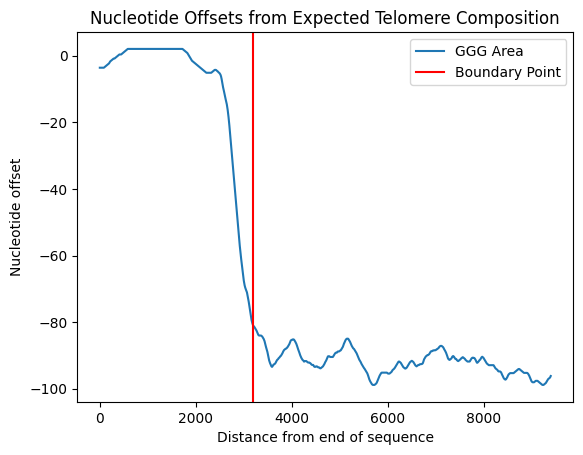

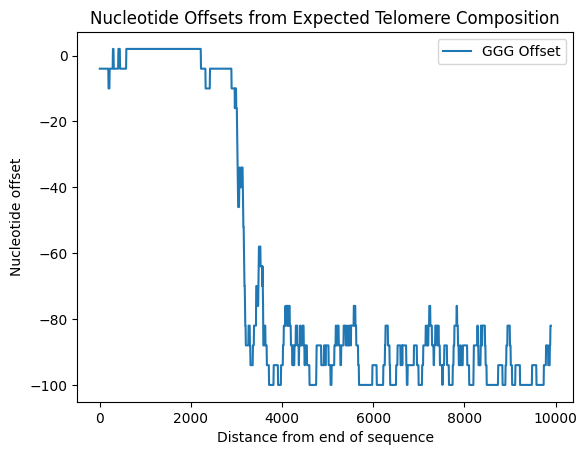

q end: 3192
offset: -18
chr02q


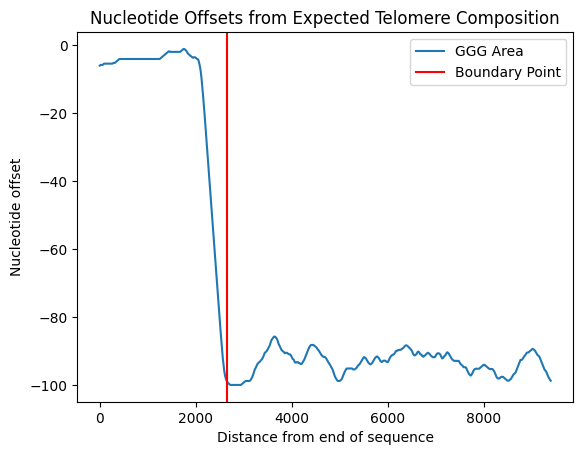

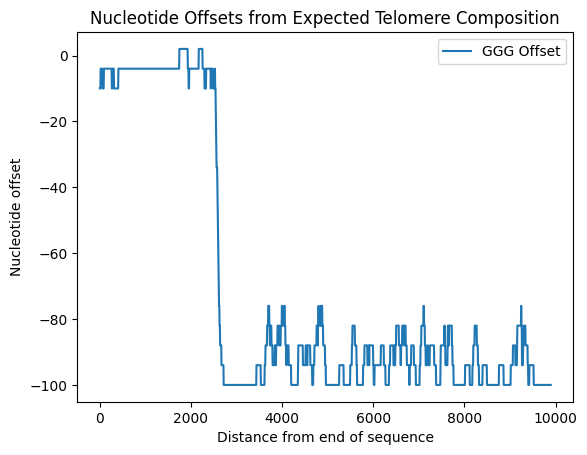

q end: 2640
offset: 18
chr03q


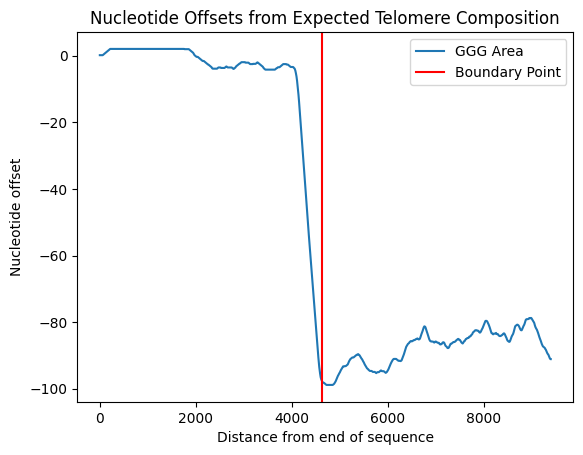

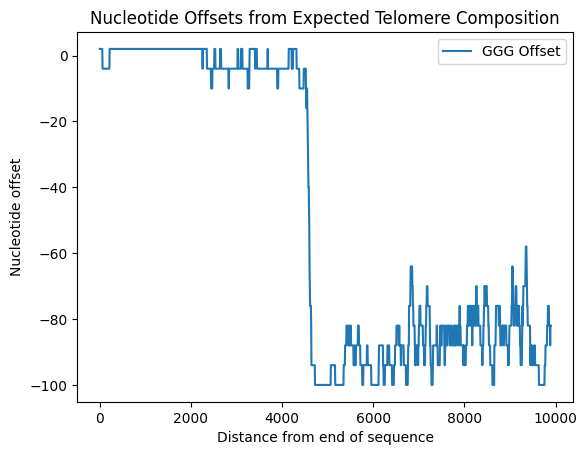

q end: 4638
offset: 23
chr04q


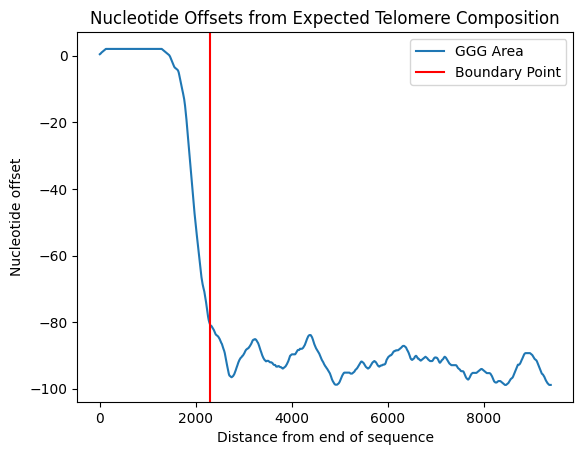

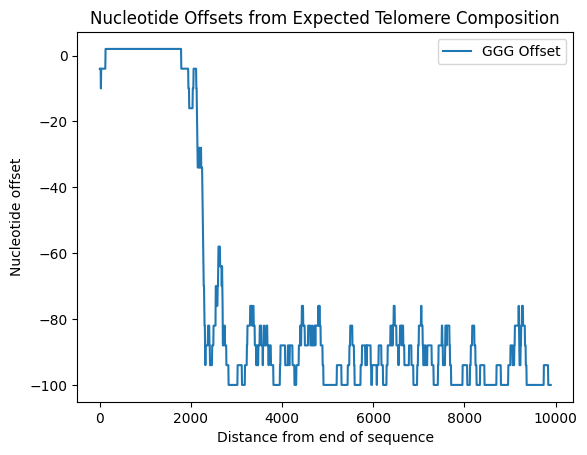

q end: 2298
offset: -23
chr05q


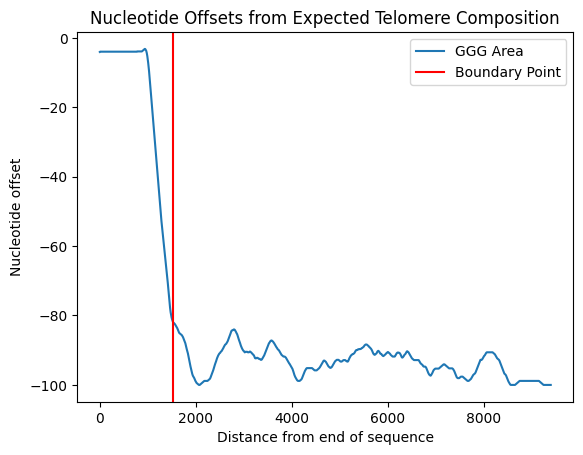

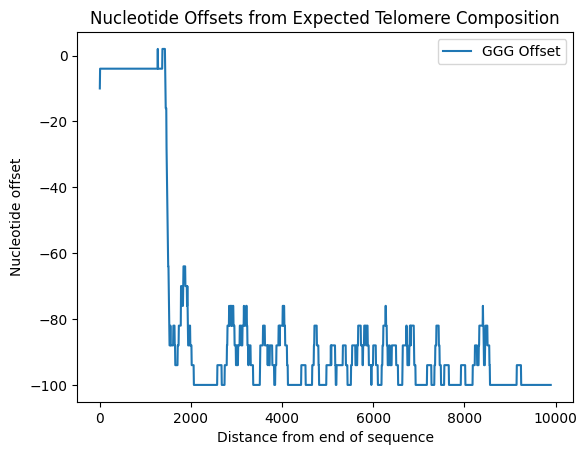

q end: 1524
offset: -6
chr06q


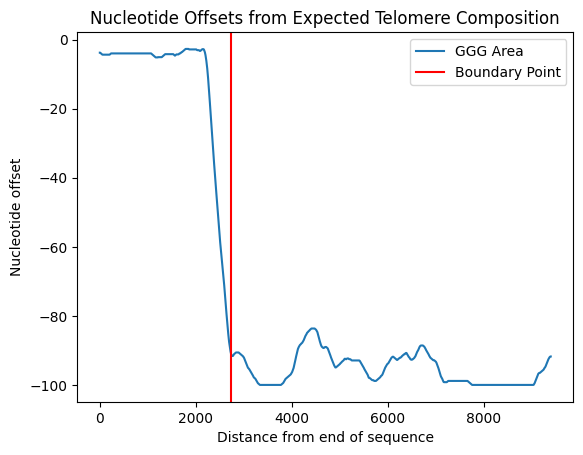

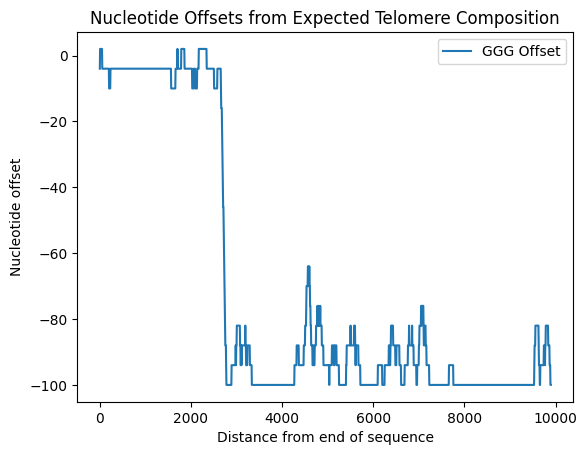

q end: 2742
offset: -36
chr07q


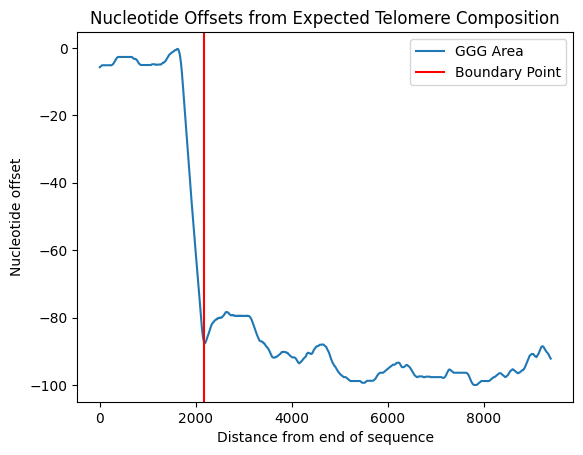

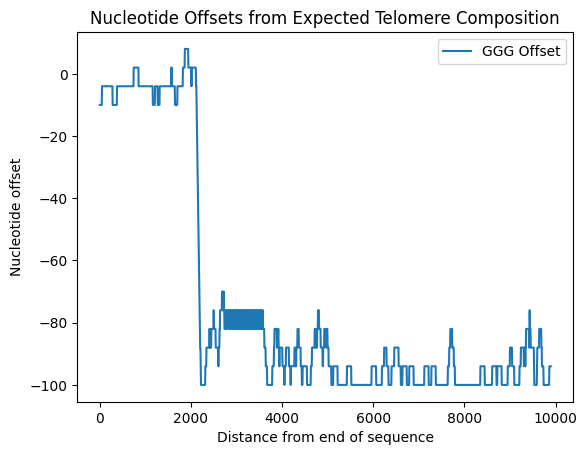

q end: 2178
offset: -44
chr08q


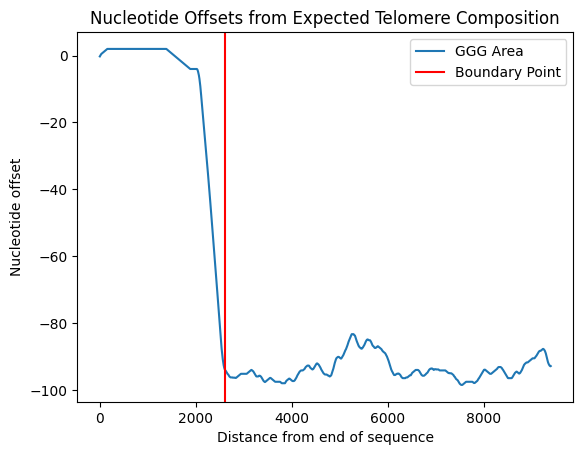

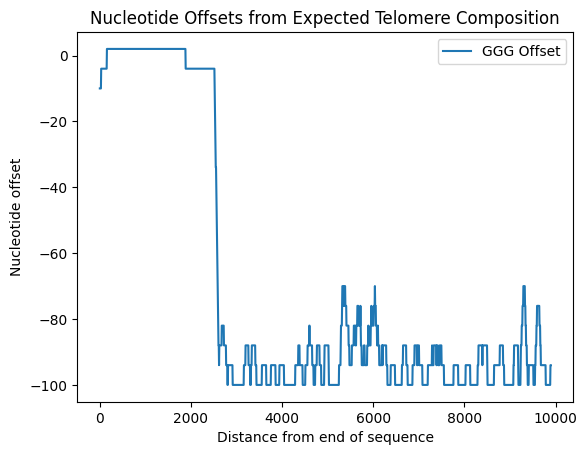

q end: 2604
offset: -17
chr09q


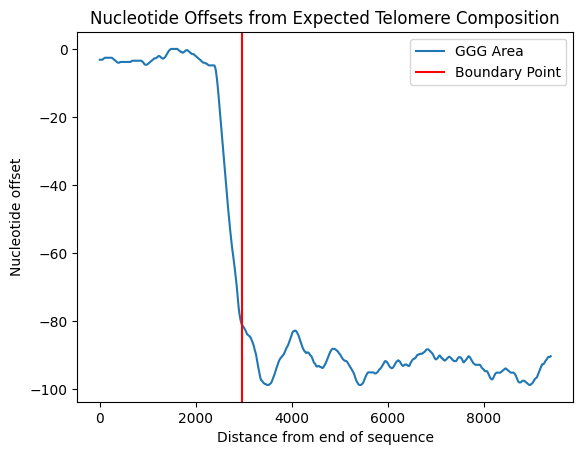

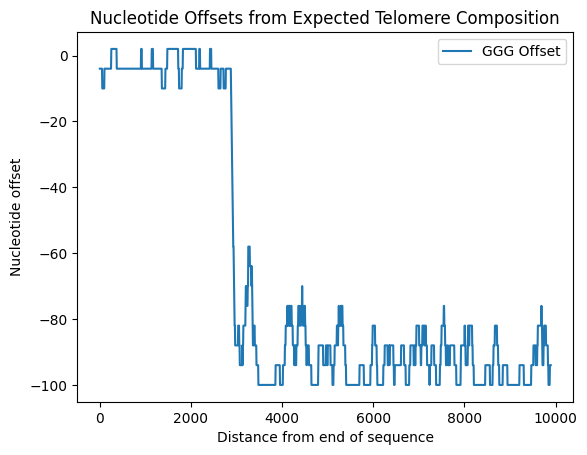

q end: 2958
offset: -19
chr10q


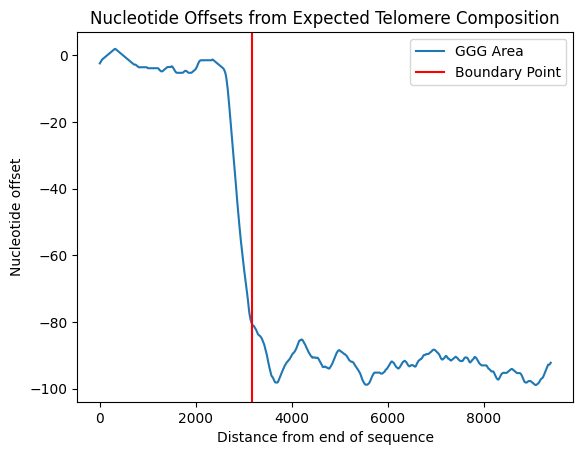

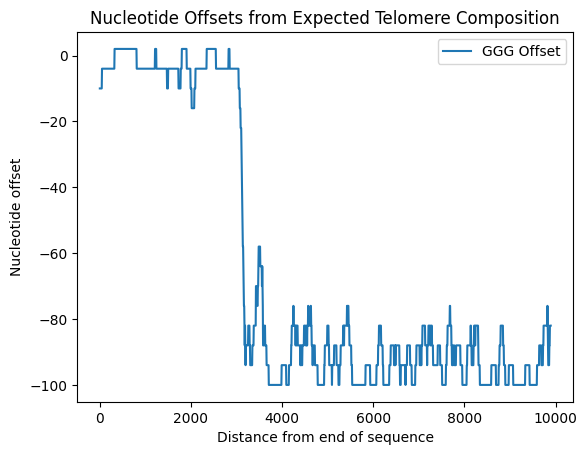

q end: 3174
offset: -29
chr11q


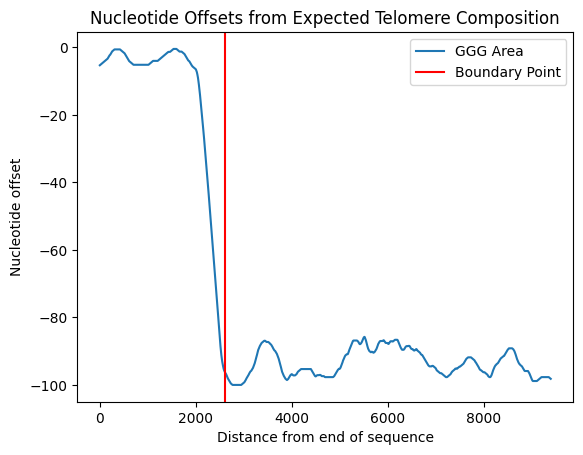

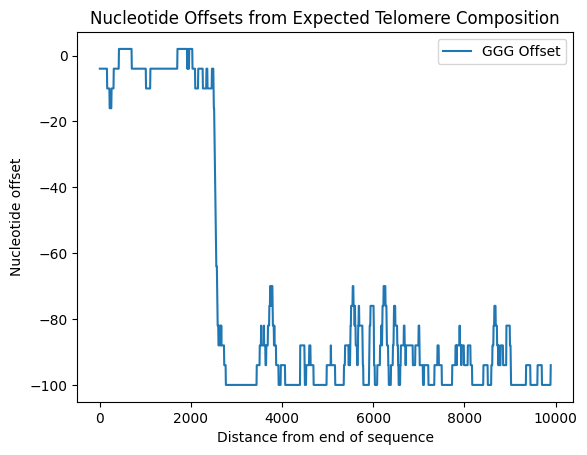

q end: 2604
offset: 15
chr12q


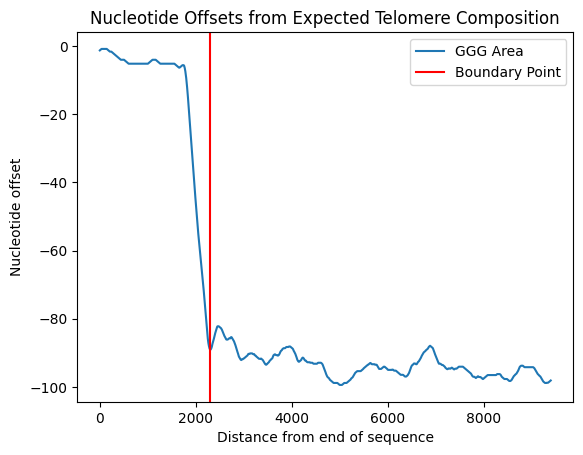

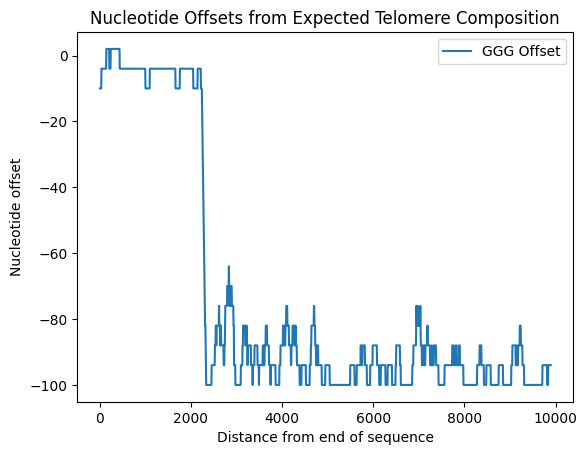

q end: 2292
offset: -47
chr13q


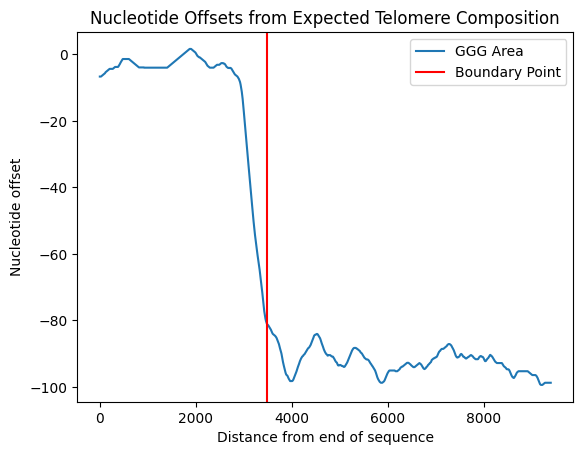

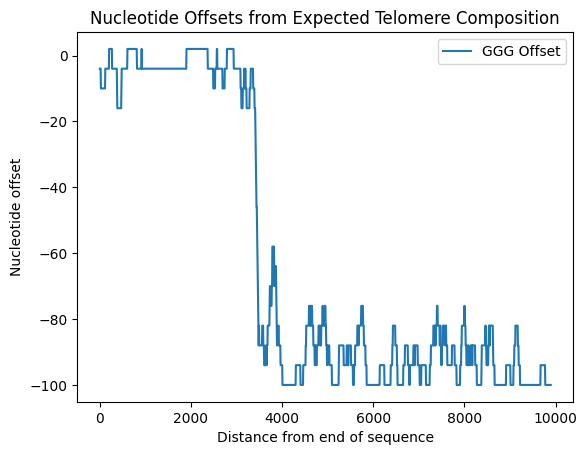

q end: 3480
offset: -26
chr14q


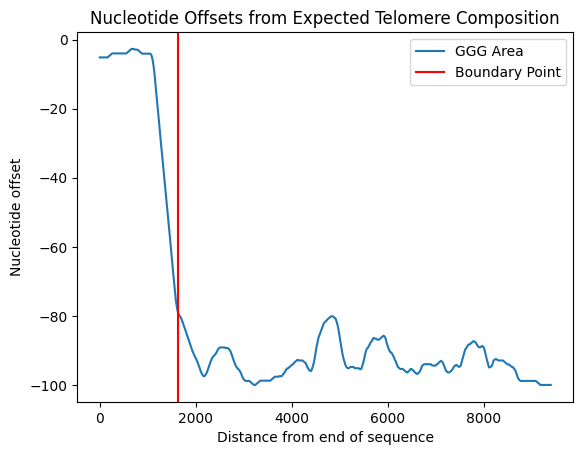

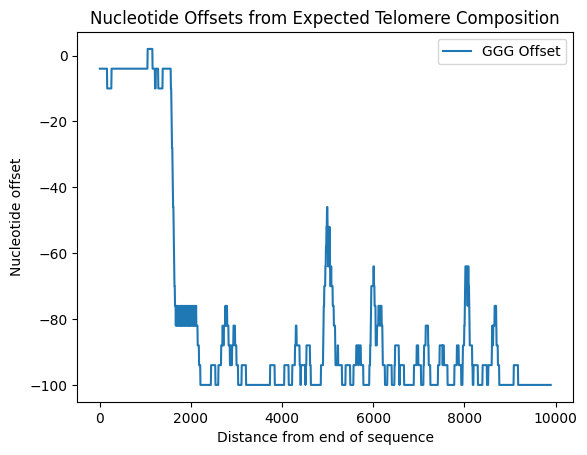

q end: 1638
offset: -14
chr15q


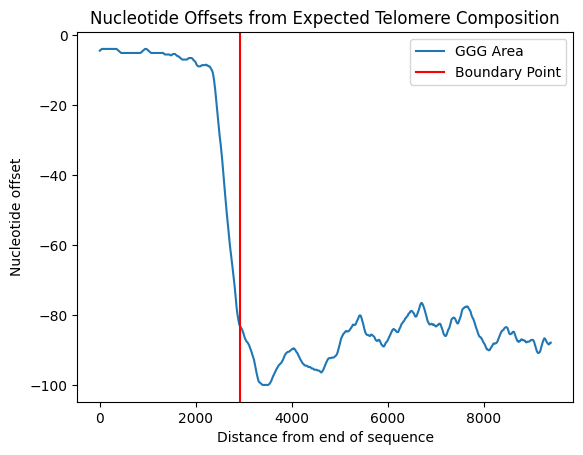

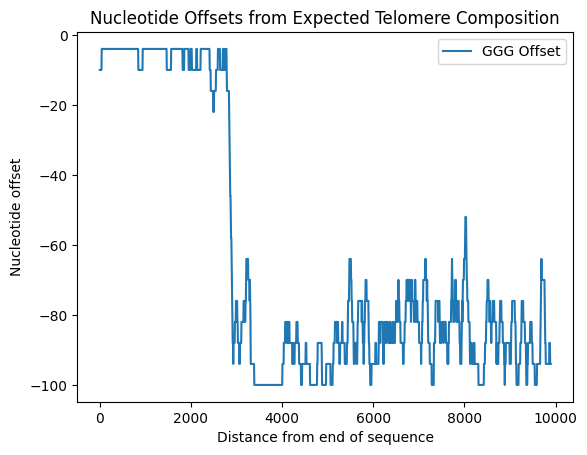

q end: 2916
offset: -13
chr16q


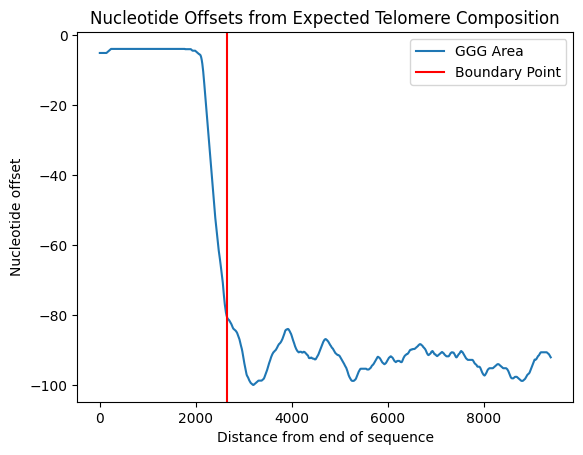

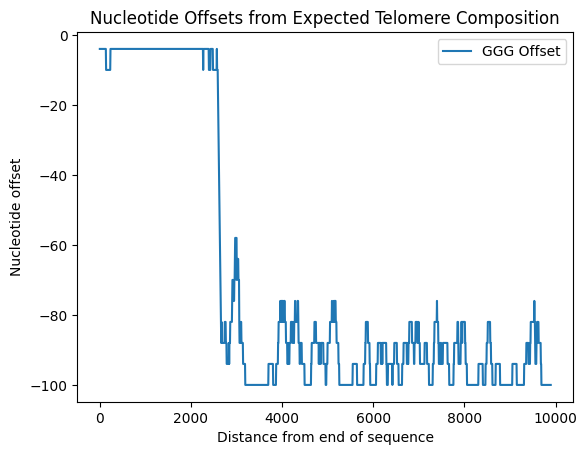

q end: 2658
offset: -25
chr17q


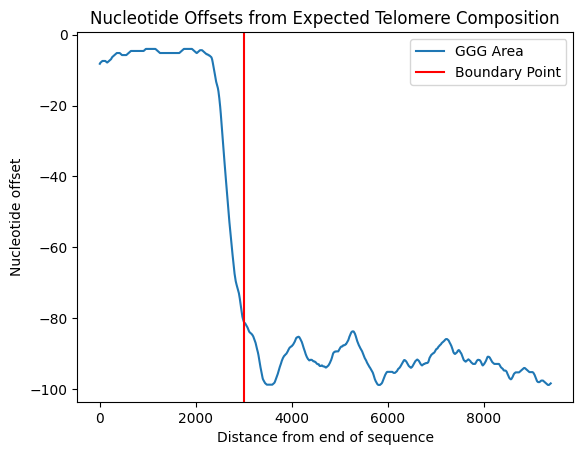

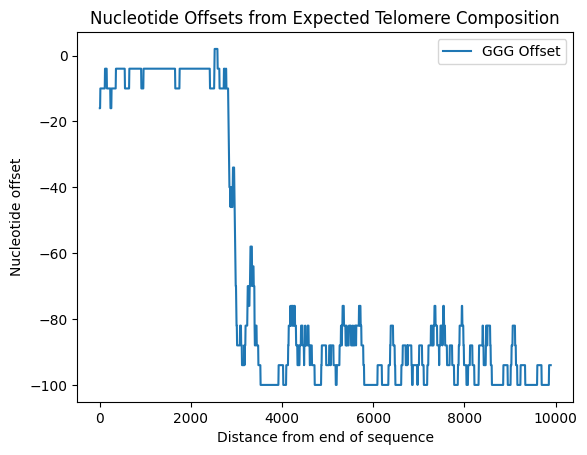

q end: 3000
offset: -21
chr18q


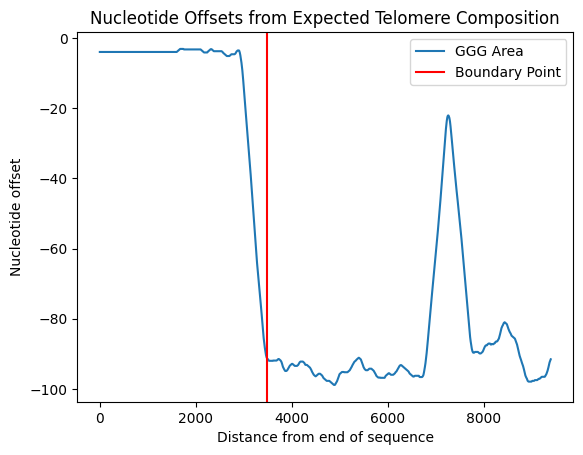

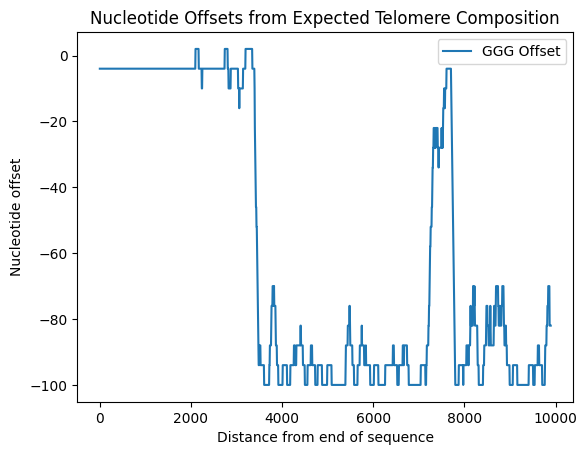

q end: 3480
offset: -9
chr19q


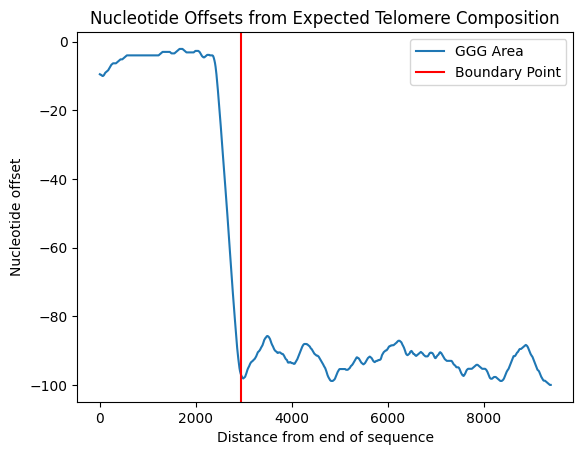

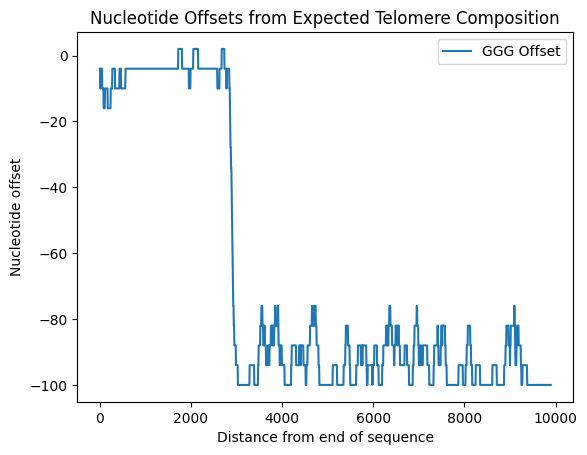

q end: 2952
offset: 12
chr20q


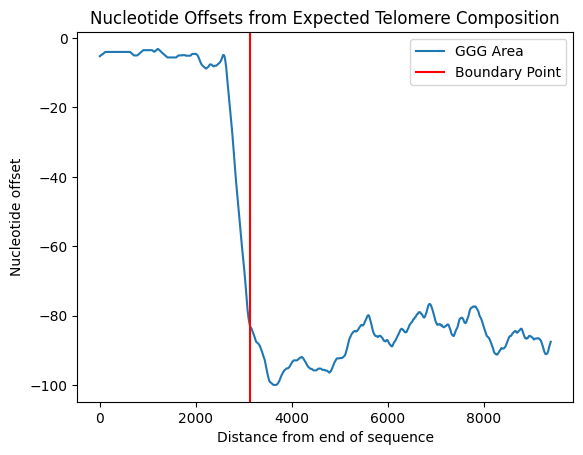

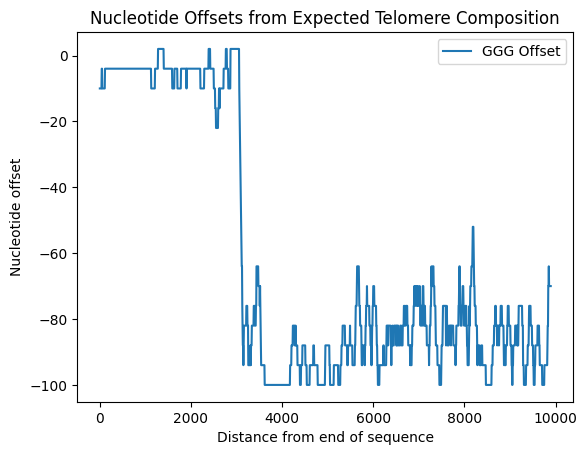

q end: 3138
offset: -15
chr21q


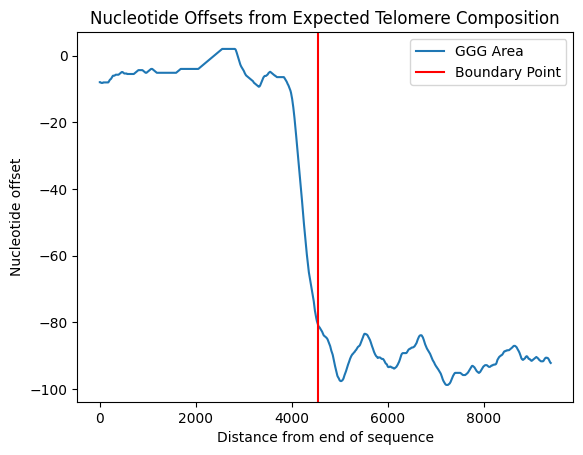

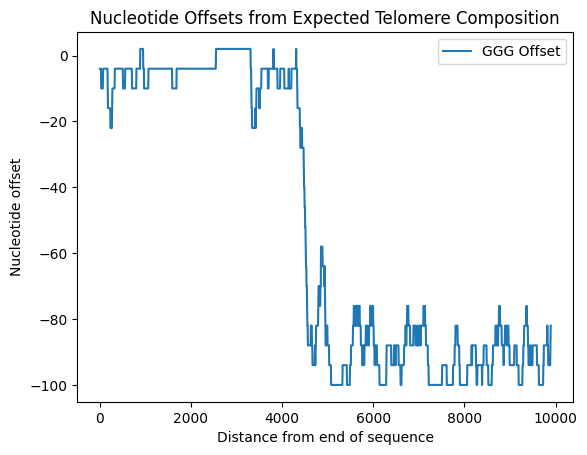

q end: 4554
offset: -19
chr22q


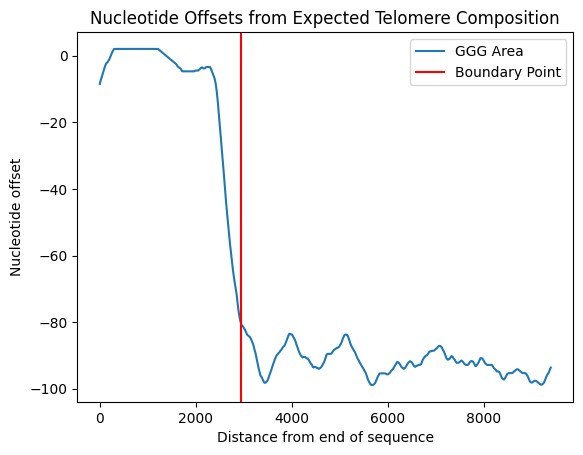

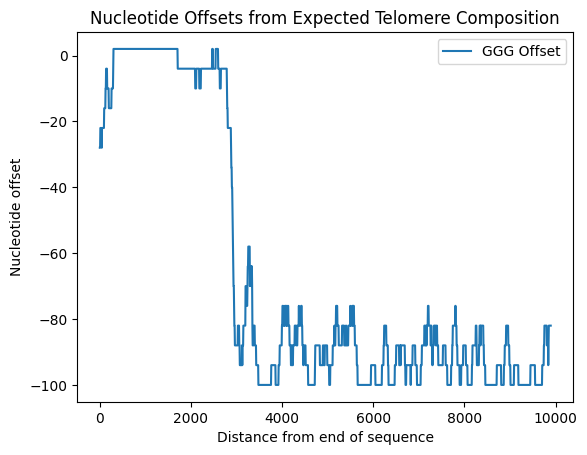

q end: 2952
offset: -22
chrXq


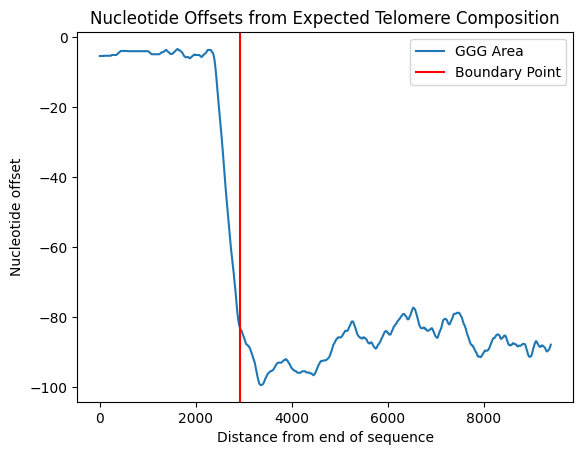

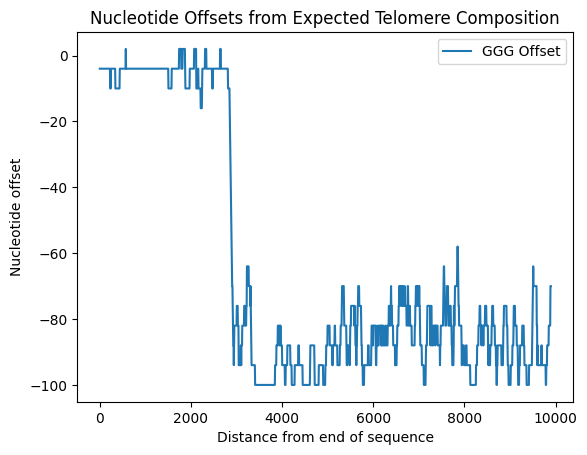

q end: 2928
offset: -15
chrYq


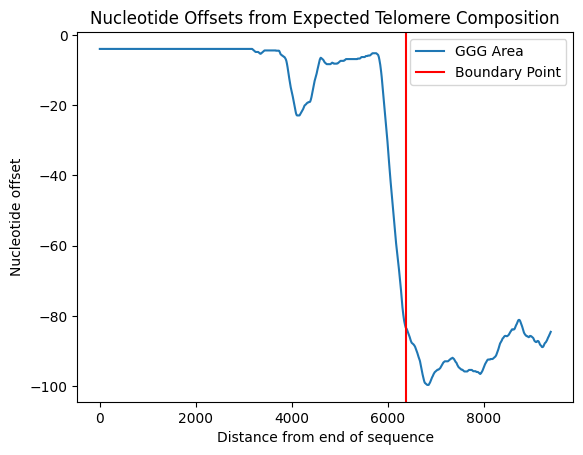

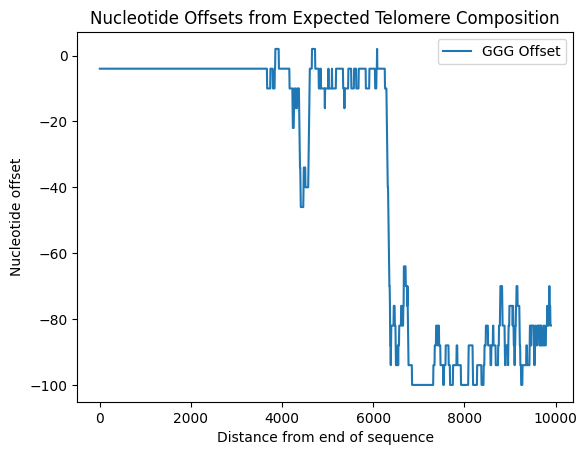

q end: 6372
offset: -16
chr01p


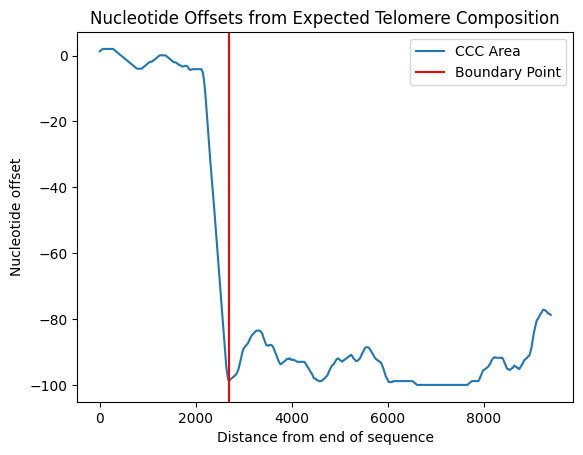

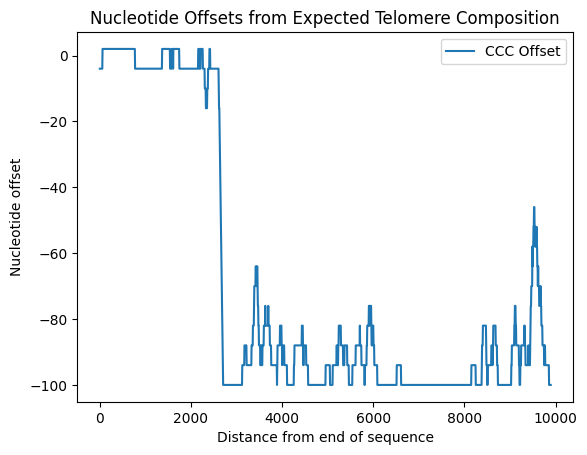

p end: 2682
offset: -22
chr02p


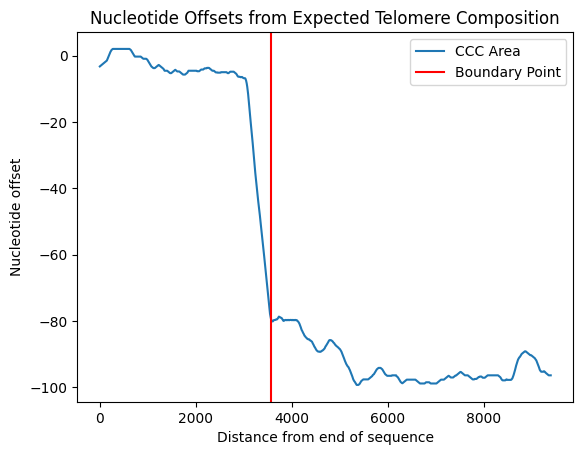

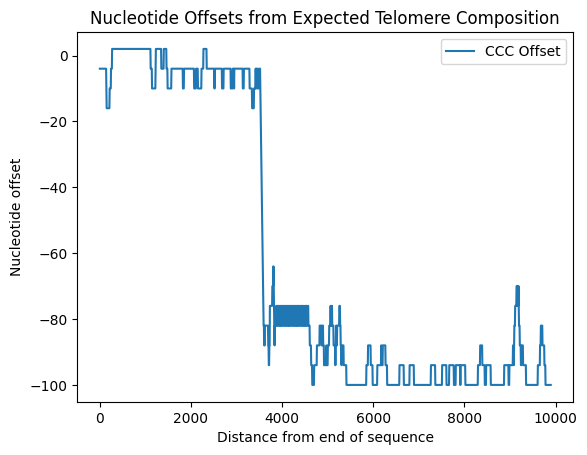

p end: 3576
offset: -41
chr03p


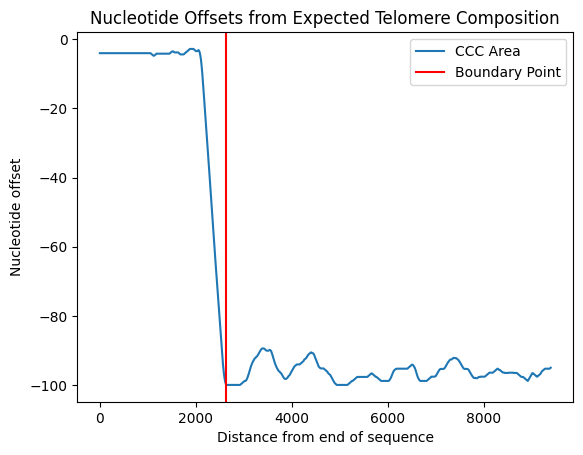

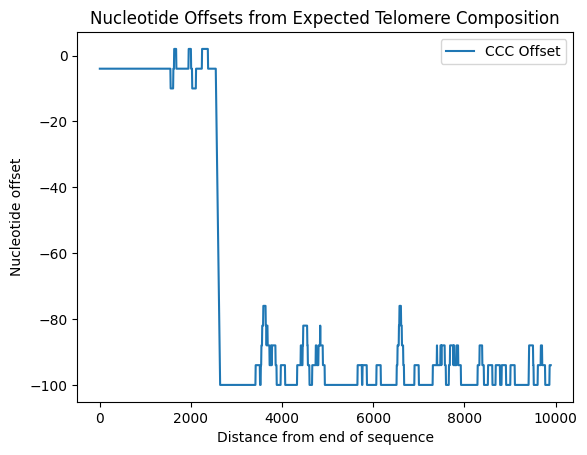

p end: 2628
offset: -12
chr04p


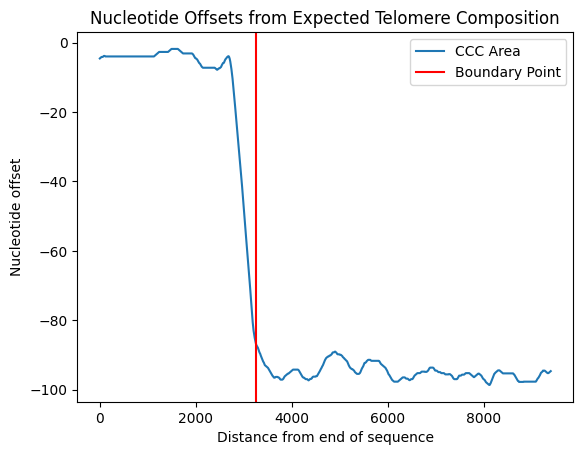

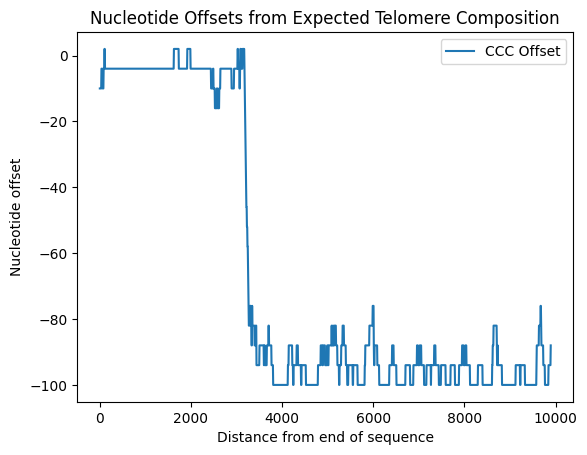

p end: 3264
offset: -3
chr05p


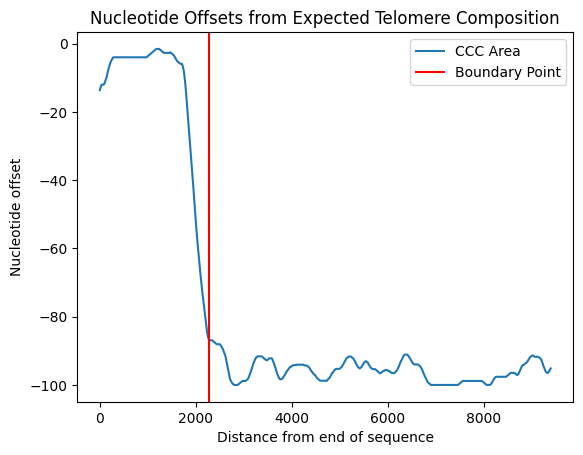

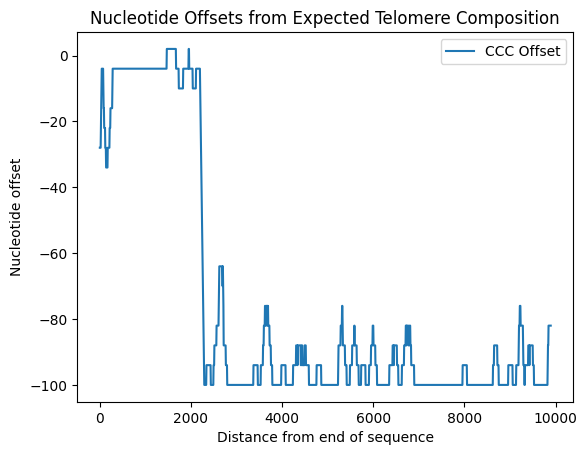

p end: 2274
offset: -21
chr06p


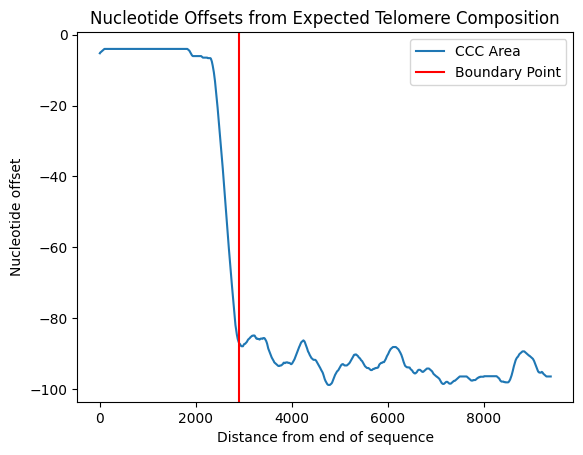

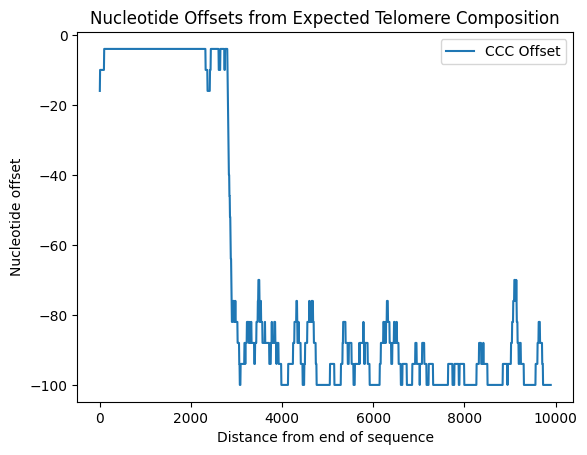

p end: 2898
offset: 2
chr07p


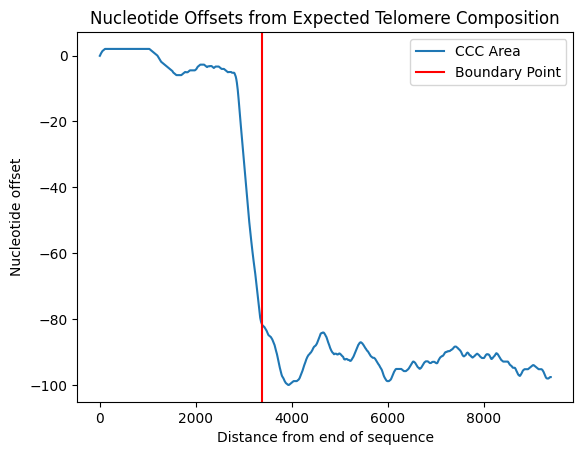

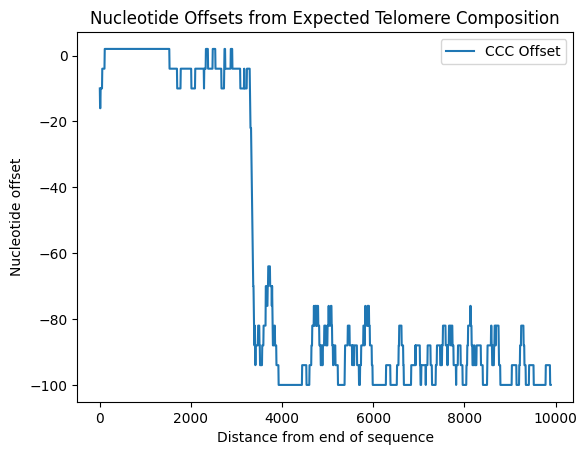

p end: 3384
offset: 10
chr08p


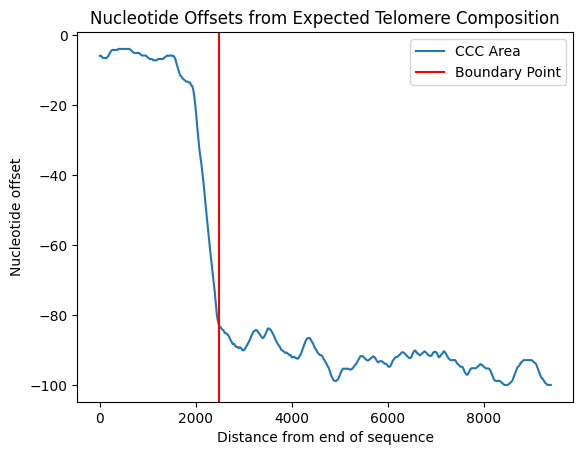

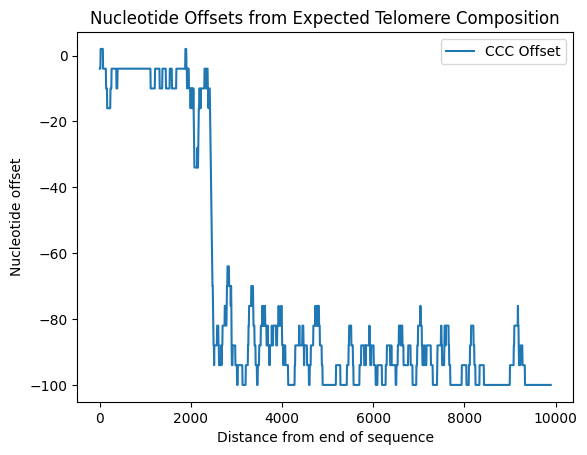

p end: 2490
offset: -27
chr09p


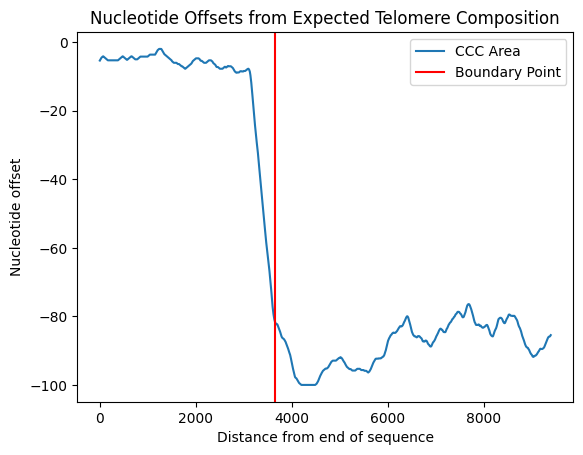

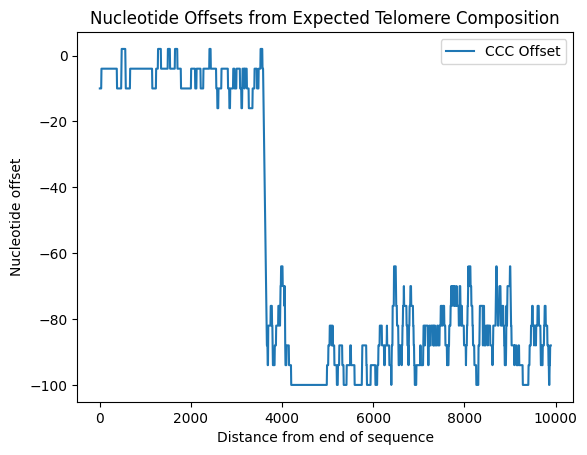

p end: 3660
offset: 74
chr10p


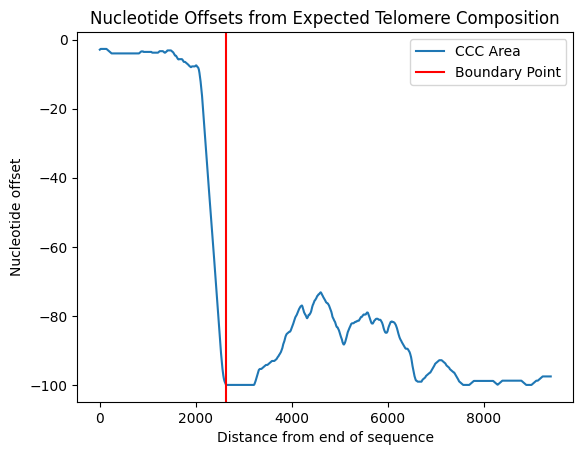

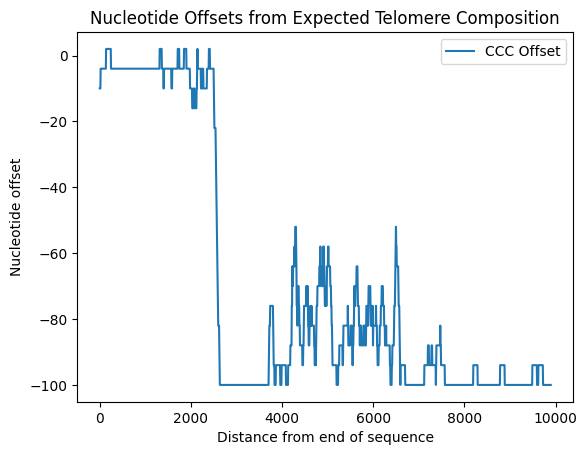

p end: 2622
offset: -15
chr11p


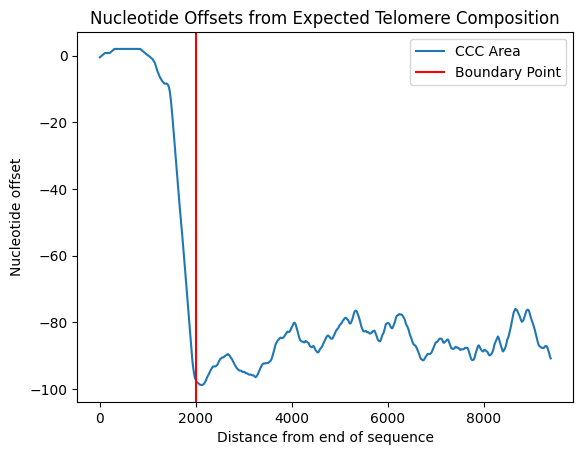

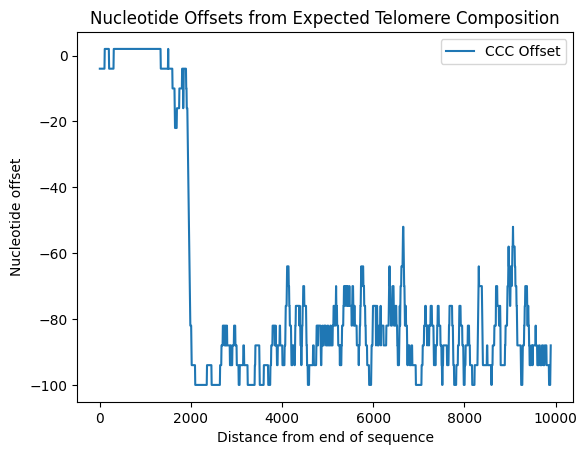

p end: 2010
offset: 23
chr12p


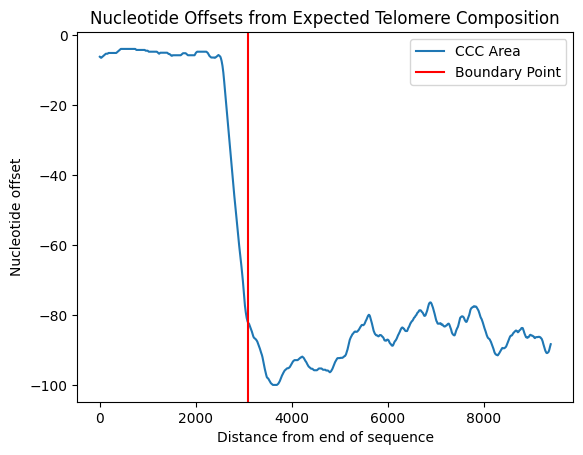

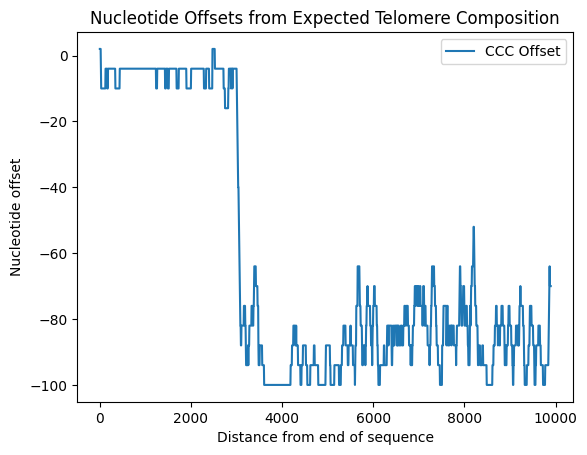

p end: 3084
offset: -17
chr13p


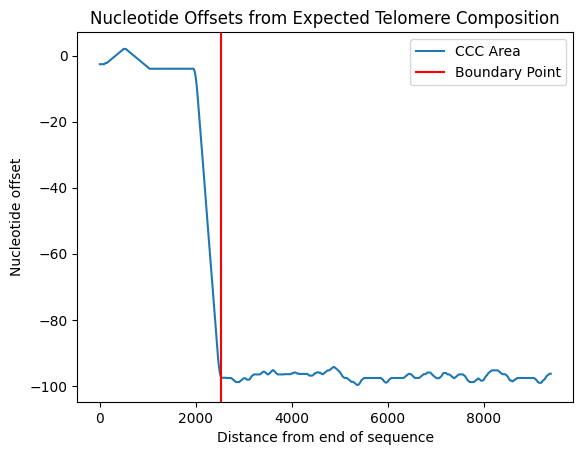

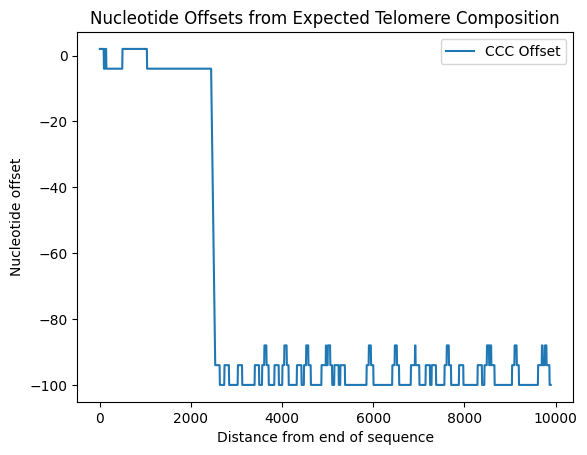

p end: 2526
offset: -17
chr14p


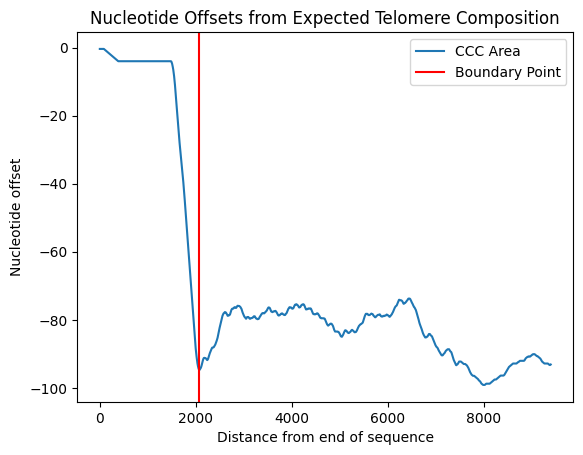

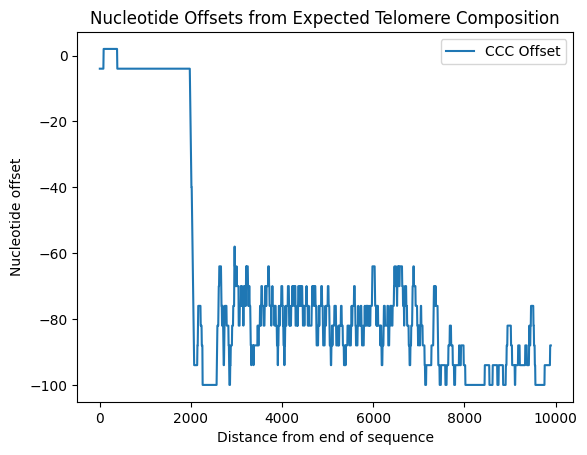

p end: 2064
offset: -10
chr15p


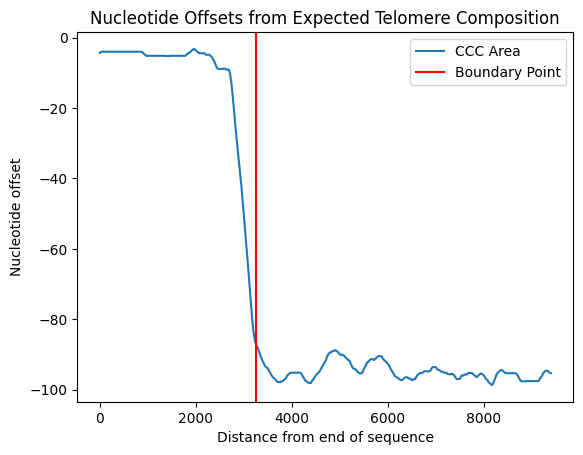

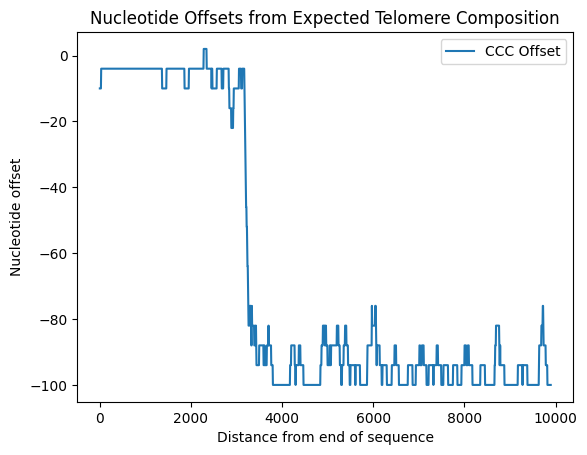

p end: 3258
offset: -6
chr16p


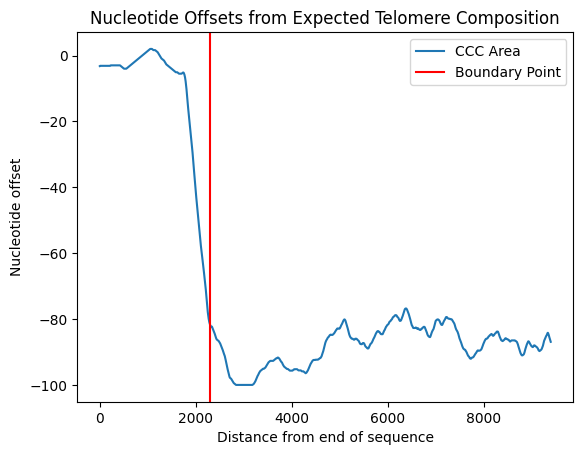

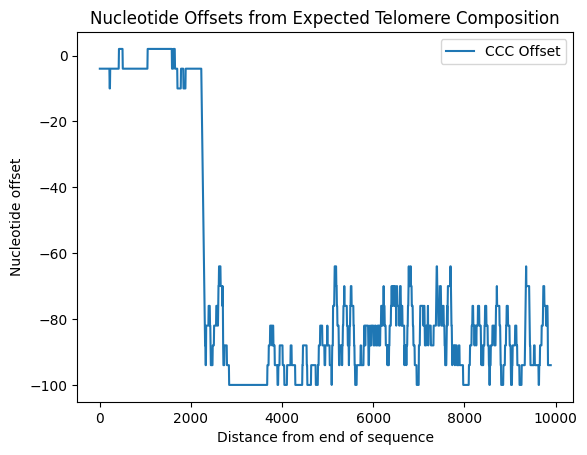

p end: 2304
offset: -19
chr17p


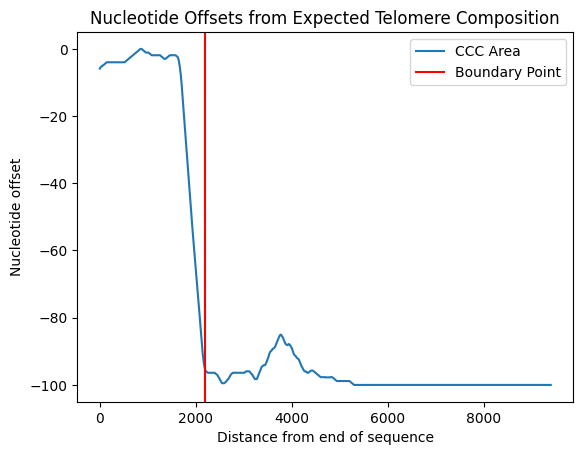

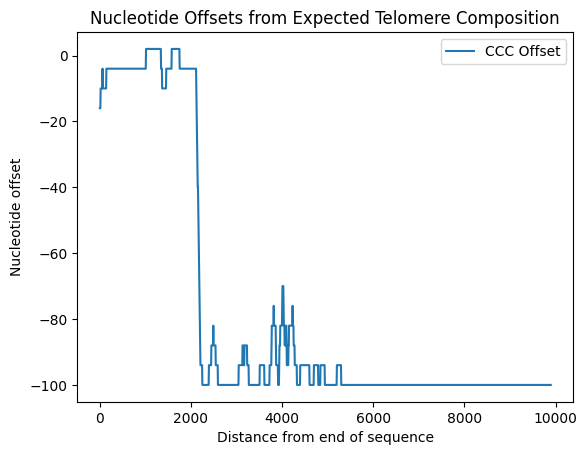

p end: 2202
offset: -7
chr18p


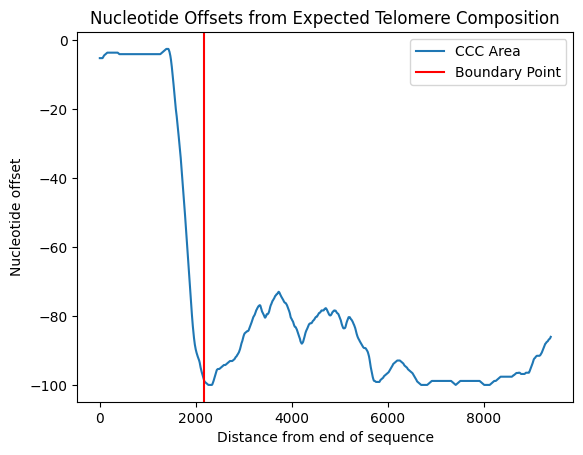

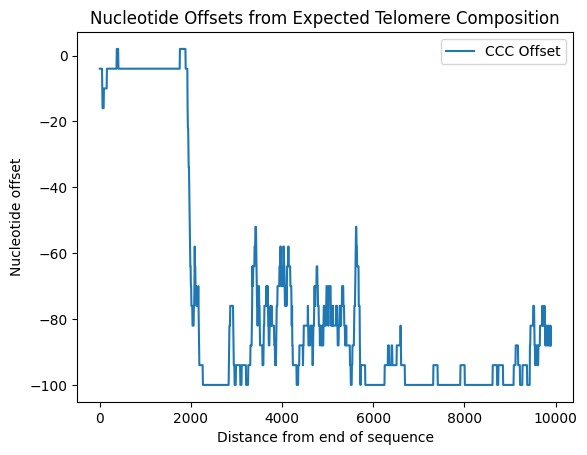

p end: 2178
offset: 163
chr19p


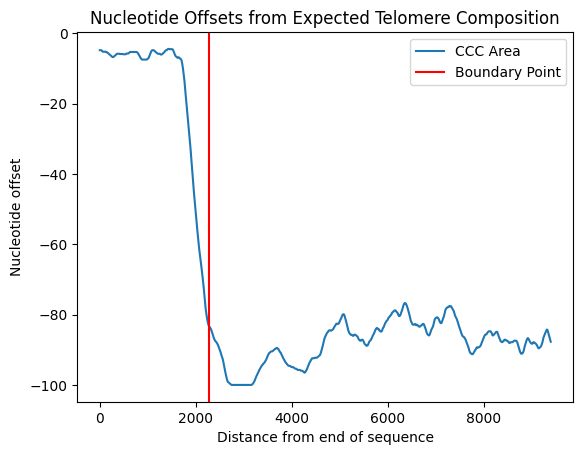

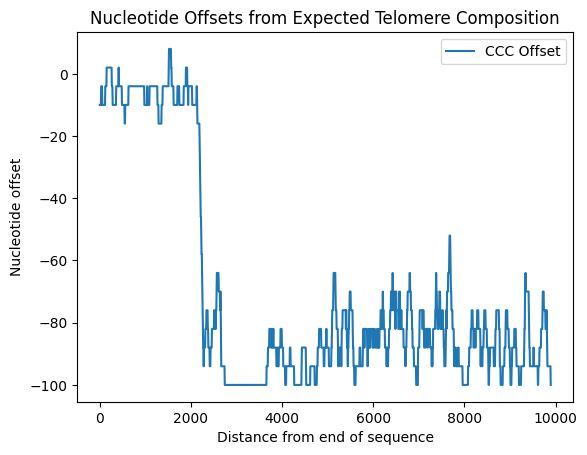

p end: 2268
offset: -16
chr20p


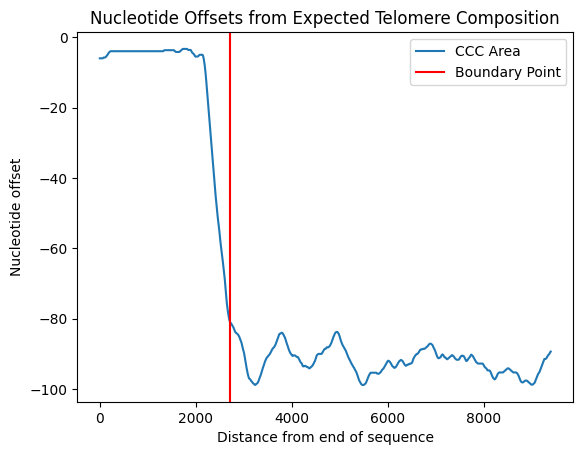

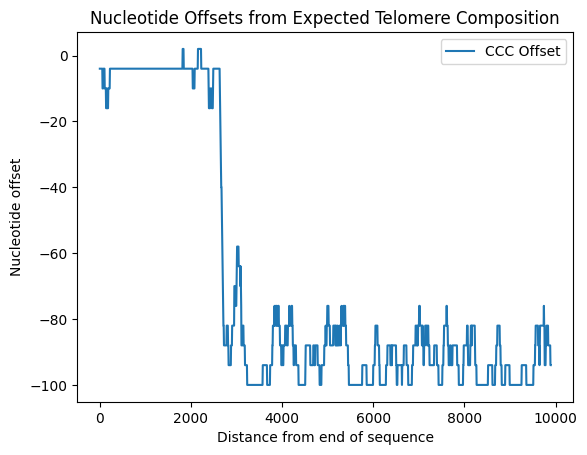

p end: 2712
offset: -15
chr21p


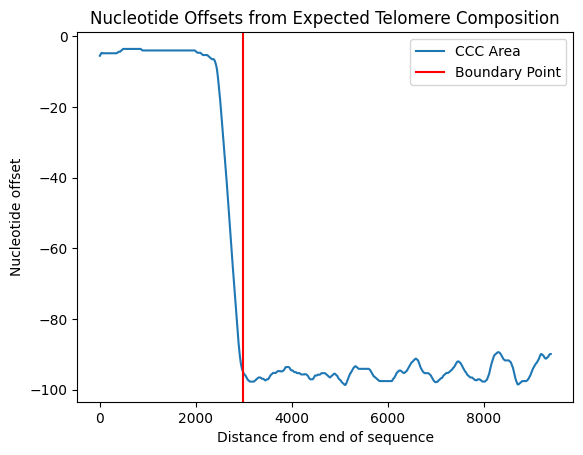

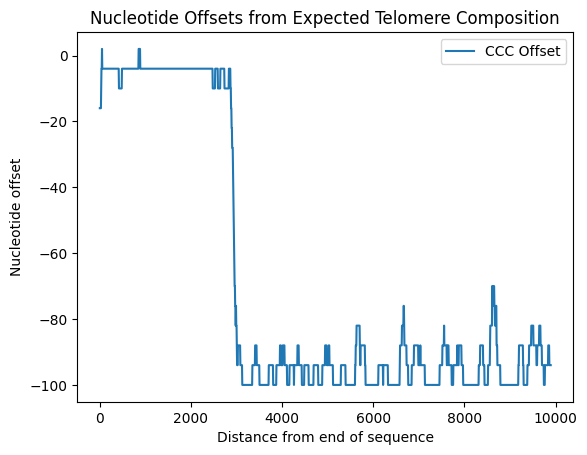

p end: 2982
offset: -30
chr22p


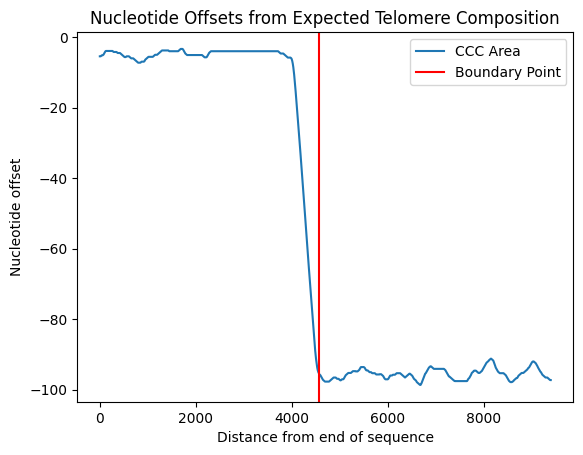

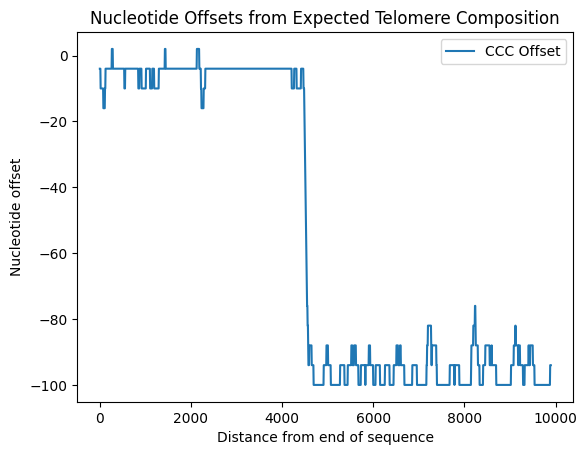

p end: 4560
offset: -17
chrXp


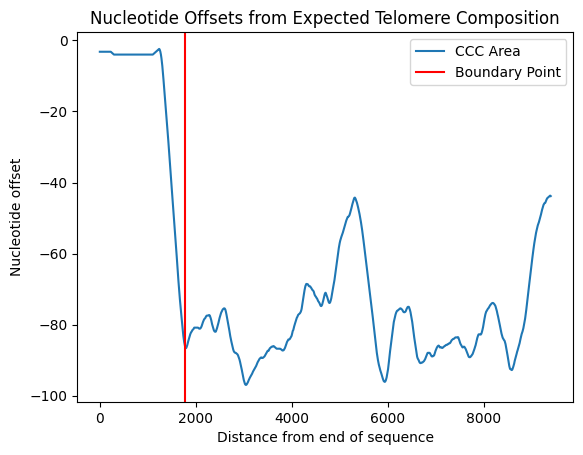

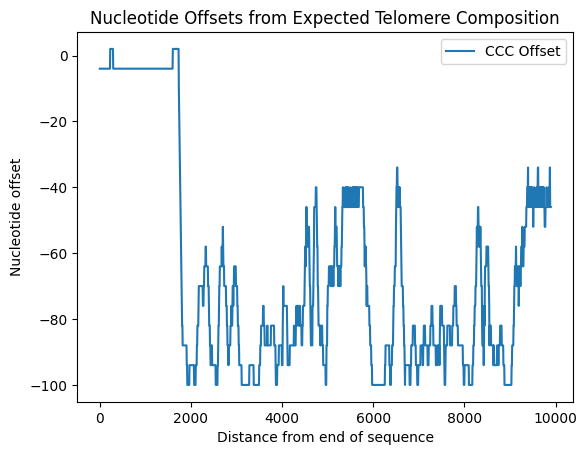

p end: 1782
offset: -44
chrYp


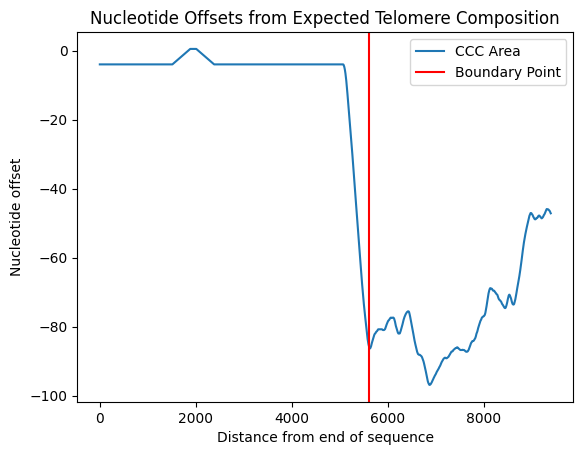

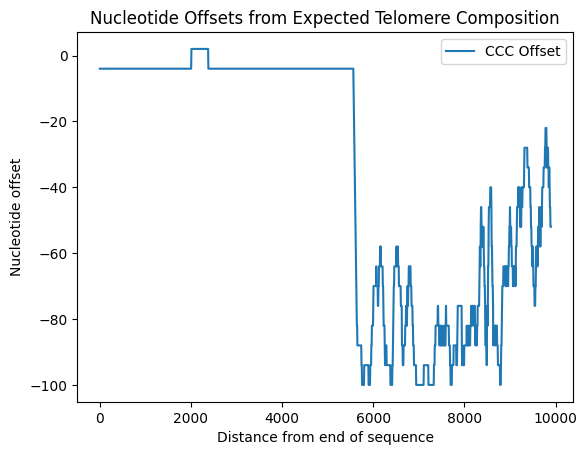

p end: 5616
offset: -42


In [3]:


bed_data = []
offsetScores = []

showGraphs = True

filename = "Data/GCA_009914755.4_T2T-CHM13v2.0_genomic.500kb.ends.fna"
for record in SeqIO.parse(filename, "fasta"):
    chrName = record.id
    print(chrName)

    if "p" in chrName:
        distanceFromStart = getTeloBoundary(record.seq[:10000], composition=[["CCC",3/6]], targetPatternIndex=-1, isGStrand=False, teloWindow=100,nucleotideGraphAreaWindowSize=500, windowStep=6,plateauDetectionThreshold=-60, changeThreshold=-20, showGraphs=showGraphs)
        print("p end: " + str(distanceFromStart))
        pEndIndex = distanceFromStart
        bed_data.append([chrName, pEndIndex-6, pEndIndex, chrName])
        offset = testTeloLength(chrName, distanceFromStart, c.manualLabelsCHM13)
        print("offset: "+str(offset))
        offsetScores.append([chrName, offset])
    else:
        distanceFromEnd = getTeloBoundary(record.seq[-10000:], composition=[["GGG",3/6]], targetPatternIndex=-1, isGStrand = True, teloWindow=100,nucleotideGraphAreaWindowSize=500, windowStep=6,plateauDetectionThreshold=-60, changeThreshold=-20, showGraphs=showGraphs)
        print("q end: " + str(distanceFromEnd))
        qEndIndex = len(record.seq)-distanceFromEnd
        bed_data.append([chrName, qEndIndex, qEndIndex+6, chrName])
        offset = testTeloLength(chrName, distanceFromEnd, c.manualLabelsCHM13)
        print("offset: "+str(offset))
        offsetScores.append([chrName, offset])
        
# write_bed_file("./teloBoundaryOutput/TeloBP%2.0Values.bed", bed_data)